# Understanding the Weights in RNNs

## Instructions
0. If you haven't already, follow [the setup instructions here](https://jennselby.github.io/MachineLearningCourseNotes/#setting-up-python3) to get all necessary software installed.
0. Look at the code in [Part A: Single Unit Simple Recurrent Layer](#Part-A:-Single-Unit-Simple-Recurrent-Layer) and complete the [Part A Exercise](#Part-A-Exercise)
0. Look at the code in [Part B: Two Unit Simple Recurrent Layer](#Part-B:-Two-Unit-Simple-Recurrent-Layer) and complete the [Part B Exercise](#Part-B-Exercise)
0. Optionally, look at the code in [Part C: LSTM Layer](#Part-C:-LSTM-Layer) and complete the [Part C Exercise](#Part-C-Exercise)

## Documentation/Sources
* [Class Notes](https://jennselby.github.io/MachineLearningCourseNotes/#recurrent-neural-networks)
* [https://machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras/](https://machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras/) for information on sequence classification with keras
* [https://keras.io/](https://keras.io/) Keras API documentation
* [Keras recurrent tutorial](https://github.com/Vict0rSch/deep_learning/tree/master/keras/recurrent)

## Part A: Single Unit Simple Recurrent Layer

Before we dive into something as complicated as LSTMs, Let's take a deeper look at simple recurrent layer weights.

In [1]:
import numpy
from keras.layers import SimpleRNN
from keras.models import Sequential
from keras.layers import LSTM

The neurons in the recurrent layer pass their output to the next layer, but also back to themselves. The input shape says that we'll be passing in one-dimensional inputs of unspecified length (the None is what makes it unspecified).

In [2]:
one_unit_SRNN = Sequential()
one_unit_SRNN.add(SimpleRNN(units=1, input_shape=(None, 1), activation='linear', use_bias=False))

In [3]:
one_unit_SRNN_weights = one_unit_SRNN.get_weights()
one_unit_SRNN_weights

[array([[0.7713295]], dtype=float32), array([[1.]], dtype=float32)]

We can set the weights to whatever we want, to test out what happens with different weight values.

In [77]:
one_unit_SRNN_weights[0][0][0] = 1
one_unit_SRNN_weights[1][0][0] = 0
one_unit_SRNN.set_weights(one_unit_SRNN_weights)
one_unit_SRNN.get_weights()

[array([[1.]], dtype=float32), array([[0.]], dtype=float32)]

We can then pass in different input values, to see what the model outputs.

The code below passes in a single sample that has three time steps.

In [78]:
one_unit_SRNN.predict(numpy.array([ [[3], [5], [7], [2], [1]] ]))

array([[1.]], dtype=float32)

## Part A Exercise
Figure out what the two weights in the one_unit_SRNN model control. Be sure to test your hypothesis thoroughly. Use different weights and different inputs.

My hypothesis is that the second weight is the weight between time layers, and the first weight is the weight of the final layer. i.e. ((((3\*2 + 5)\*2 + 7)\*2 + 2)\*2 + 1)\*1

## Part B: Two Unit Simple Recurrent Layer

In [35]:
two_unit_SRNN = Sequential()
two_unit_SRNN.add(SimpleRNN(units=2, input_shape=(None, 1), activation='linear', use_bias=False))

In [36]:
two_unit_SRNN_weights = two_unit_SRNN.get_weights()
two_unit_SRNN_weights

[array([[ 0.12167084, -1.1356131 ]], dtype=float32),
 array([[ 0.26636565, -0.963872  ],
        [-0.963872  , -0.2663657 ]], dtype=float32)]

In [86]:
two_unit_SRNN_weights[0][0][0] = 1
two_unit_SRNN_weights[0][0][1] = 1
two_unit_SRNN_weights[1][0][0] = 0
two_unit_SRNN_weights[1][0][1] = 0
two_unit_SRNN_weights[1][1][0] = 1
two_unit_SRNN_weights[1][1][1] = 0
two_unit_SRNN.set_weights(two_unit_SRNN_weights)
two_unit_SRNN.get_weights()

[array([[1., 1.]], dtype=float32),
 array([[0., 0.],
        [1., 0.]], dtype=float32)]

This passes in a single sample with four time steps.

In [88]:
two_unit_SRNN.predict(numpy.array([ [[3], [4], [5], [6]] ]))

array([[11.,  6.]], dtype=float32)

## Part B Exercise
What do each of the six weights of the two_unit_SRNN control? Again, test out your hypotheses carefully.

[0][0][0] is the final weight of the first unit

[0][0][1] is the final weight of the second unit

[1][0][0] is the intermediate weight of the first unit

[1][0][1] is the intermediate weight of the second unit

[1][1][0] is the cross intermediate weight of the first unit (meaning it is the intermediate weight of the first unit but it goes to the second unit rather than the first)

[1][1][1] is the cross intermediate weight from the second unit to the first

This diagram that I drew below helps demonstrate that. The top diagram shows all the connections and nodes, including the number inputted each time. In the bottom diagram I only show the cross intermediate weight of the first unit, which is the only intermediate weight on in the code right now, and also put the output of each node. You can see we get the same result for the final units.

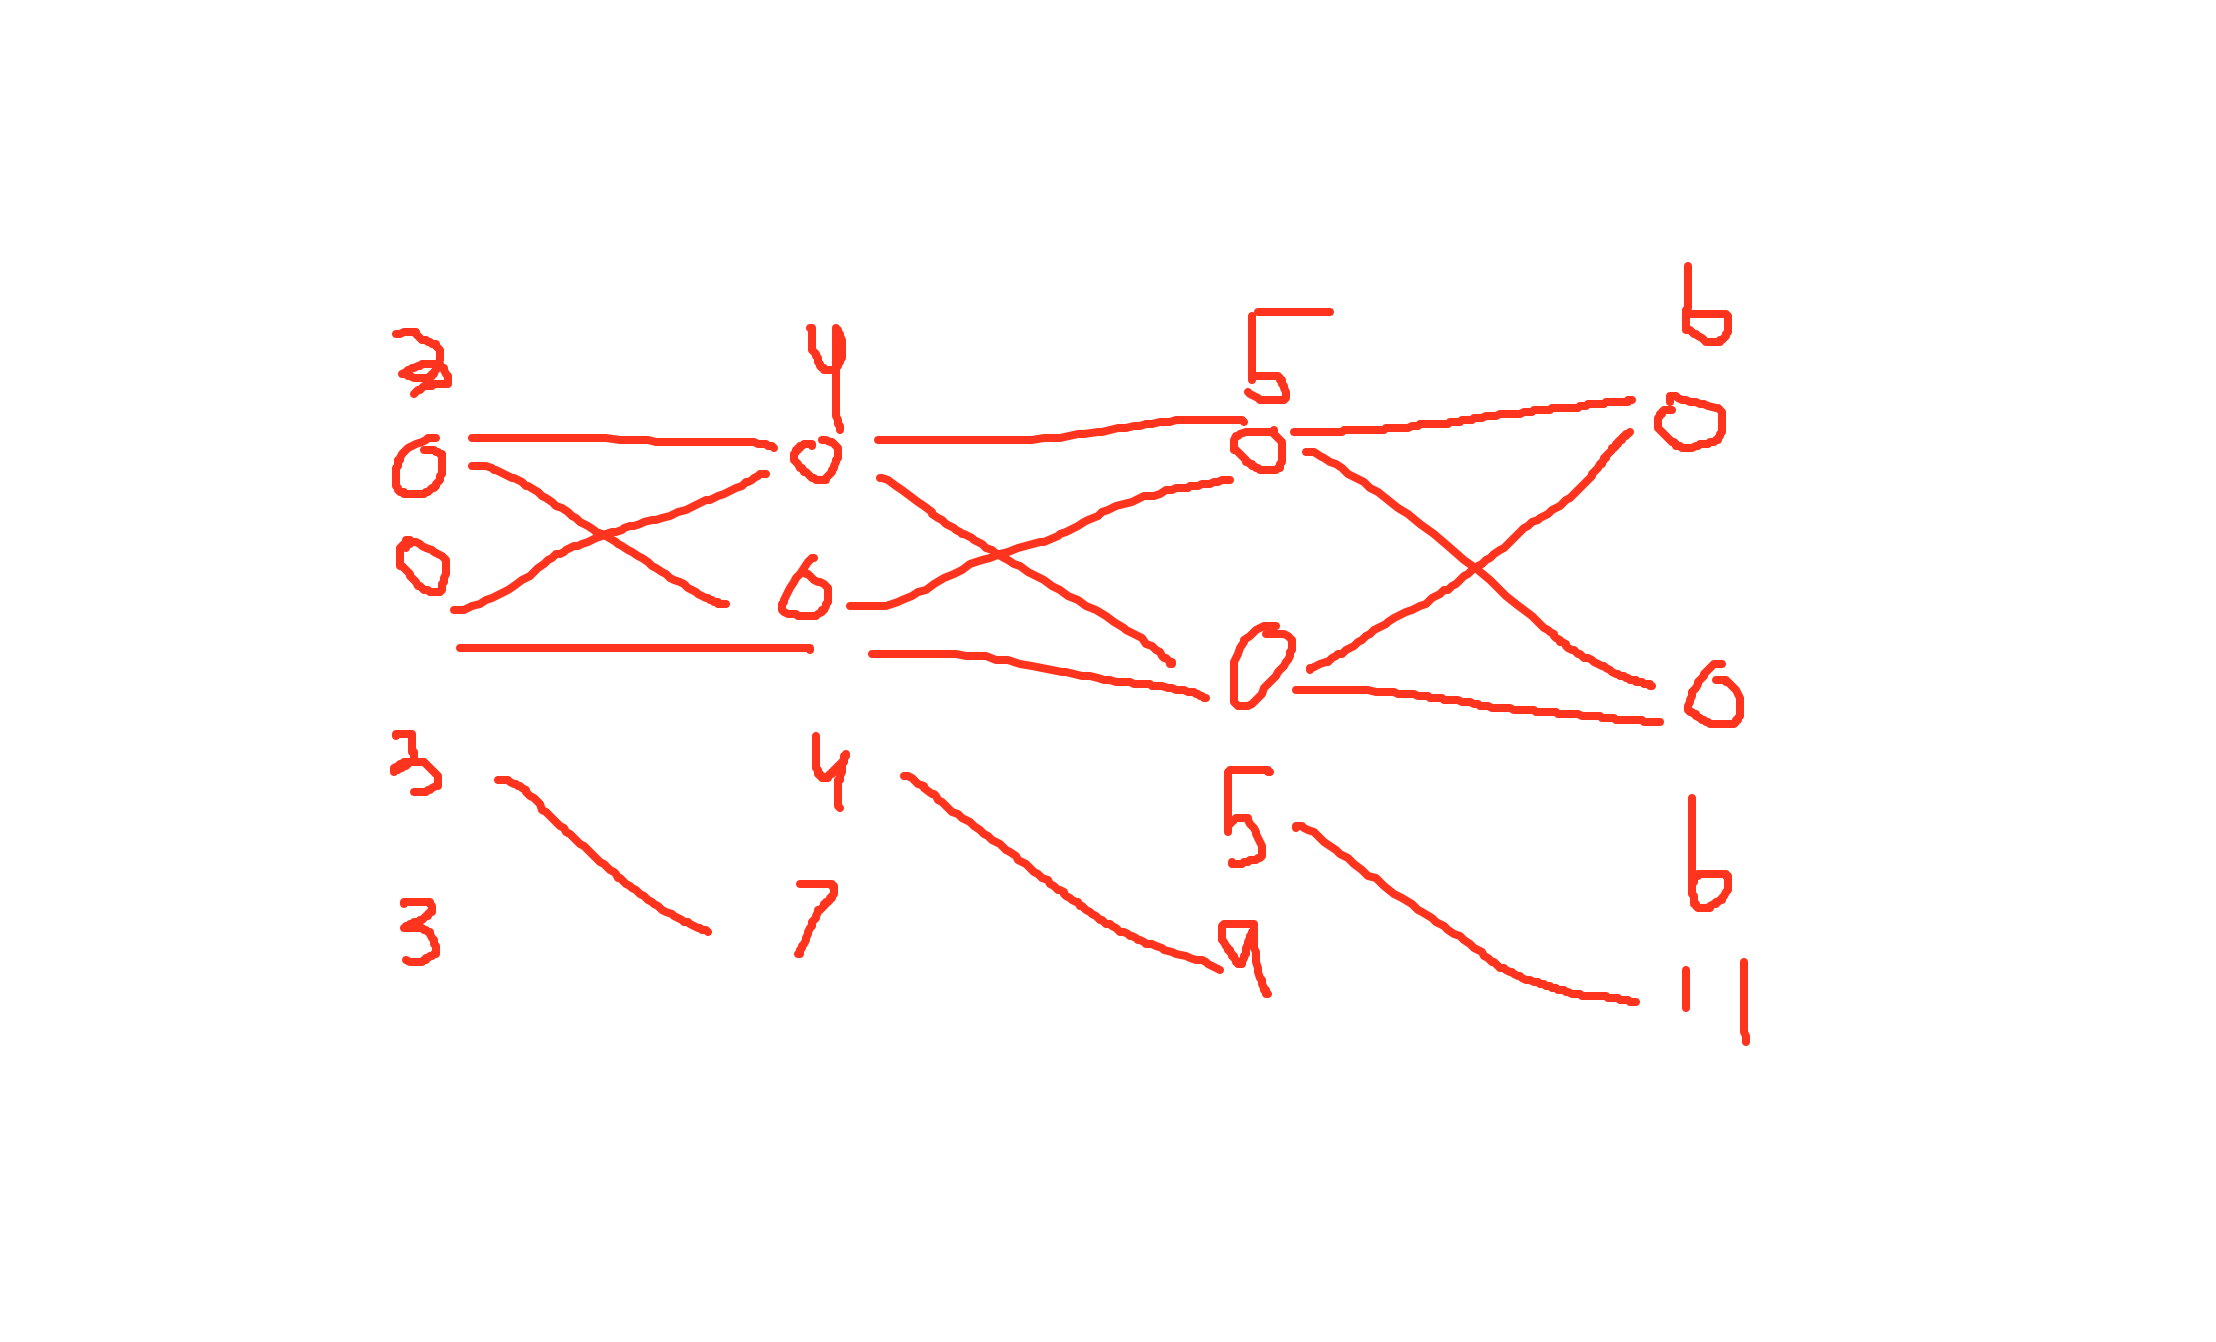

## Part C: LSTM Layer
### Optional

In [90]:
one_unit_LSTM = Sequential()
one_unit_LSTM.add(LSTM(units=1, input_shape=(None, 1),
                       activation='linear', recurrent_activation='linear',
                       use_bias=False, unit_forget_bias=False,
                       kernel_initializer='zeros',
                       recurrent_initializer='zeros',
                       return_sequences=True))

In [91]:
one_unit_LSTM_weights = one_unit_LSTM.get_weights()
one_unit_LSTM_weights

[array([[0., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., 0.]], dtype=float32)]

In [92]:
one_unit_LSTM_weights[0][0][0] = 1
one_unit_LSTM_weights[0][0][1] = 0
one_unit_LSTM_weights[0][0][2] = 1
one_unit_LSTM_weights[0][0][3] = 1
one_unit_LSTM_weights[1][0][0] = 0
one_unit_LSTM_weights[1][0][1] = 0
one_unit_LSTM_weights[1][0][2] = 0
one_unit_LSTM_weights[1][0][3] = 0
one_unit_LSTM.set_weights(one_unit_LSTM_weights)
one_unit_LSTM.get_weights()

[array([[1., 0., 1., 1.]], dtype=float32),
 array([[0., 0., 0., 0.]], dtype=float32)]

In [95]:
one_unit_LSTM.predict(numpy.array([ [[0], [1], [2], [4]] ]))

array([[[ 0.],
        [ 1.],
        [ 8.],
        [64.]]], dtype=float32)

## Part C Exercise
### Optional
Conceptually, the [LSTM](http://colah.github.io/posts/2015-08-Understanding-LSTMs/) has several _gates_:

* __Forget gate__: these weights allow some long-term memories to be forgotten.
* __Input gate__: these weights decide what new information will be added to the context cell.
* __Output gate__: these weights decide what pieces of the new information and updated context will be passed on to the output.

It also has a __cell__ that can hold onto information from the current input (as well as things it has remembered from previous inputs), so that it can be used in later outputs.

Identify which weights in the one_unit_LSTM model are connected with the context and which are associated with the three gates. This is considerably more difficult to do by looking at the inputs and outputs, so you could also treat this as a code reading exercise and look through the keras code to find the answer.

_Note_: The output from the predict call is what the linked explanation calls $h_{t}$.